### Matplotlib, Pandas, and Seaborn

Pandas has built in plotting integration with matplotlib that continues to expand.

Pandas provides plotting functionality on Series and DataFrame as a wrapper around the matplotlib libraries plot() method.

Seaborn is another package built on Matplotlib

The combination of these gives you several options for visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 %matplotlib inline

In [ ]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

In [ ]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Matplotlib styles:

matplotlib offers a range of pre-configured plotting styles. These include: 'bmh', 'dark_background', 'ggplot', 'fivethirtyeight', 'grayscale']
bmh > Bayesian Methods for Hackers

The style ican be set by calling matplotlib.style.use(my_plot_style) before creating your plot. 

In [ ]:
print(plt.style.available)

In [ ]:
from matplotlib import style
style.use('dark_background')

### Seaborn Styling

There are five preset seaborn themes that can be applied to matplotlib plots or pandas plots: darkgrid, whitegrid, dark, white, and ticks.

The default theme is darkgrid. 

In [ ]:
sns.set()

In [ ]:
# same plotting code as above
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### pandas.DataFrame.plot

Dataframe or series .plot() is a wrapper for pyplot.plot(), and generates a plot identical to the a plot with Matplotlib.


With a DataFrame, by default pandas creates one line plot for each of the numeric column.

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

In [ ]:
df.head()

In [ ]:
sns.set_style("whitegrid")
df = df.cumsum()
df.plot();



Data frame plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

- ‘line’ : line plot (default)
- ‘bar’ : vertical bar plot
- ‘barh’ : horizontal bar plot
- ‘hist’ : histogram
- ‘box’ : boxplot
- ‘kde’ : Kernel Density Estimation plot
- ‘density’ : same as ‘kde’
- ‘area’ : area plot
- ‘pie’ : pie plot
- ‘scatter’ : scatter plot
- ‘hexbin’ : hexbin plot

Each plot kind has a corresponding method on the DataFrame.plot accessor: df.plot(kind='line') is equivalent to df.plot.line().


To specify one column to plot use a selection method.
Hence, the plot() method works on both Series and DataFrame.

In [ ]:
df["A"].plot();
# whenever matplotlib is executed, 
#the output includes a text string that can be very visually unappealing. 
#Semicolon block this output

In [ ]:
plt.style.use('default')

### Bar plots in pandas

By default, the index of the DataFrame or Series is placed on the x-axis and the values in the selected column are rendered as bars - the y label is left empty.


Every Pandas bar chart works this way; additional columns become a new sets of bars on the chart.


You can set the xlabel and ylabel arguments to give the plot custom labels for x and y axis. 

In [ ]:
sns.set_style("whitegrid")
plotdata = pd.DataFrame({
    "cabbages_2020":[10, 10, 42, 17, 37]
    }, 
    index=["Field1", "Field2", "Field3", "Field4", "Field5"]
)
plotdata.plot(kind="bar", title="Cabbage Production")


With Pandas plot(), labelling of the axis is achieved using the Matplotlib syntax on the “plt” object imported from pyplot. The key functions are:

“xlabel” to add an x-axis label

“ylabel” to add a y-axis label

“title” to add a plot title

In [ ]:
plotdata['cabbages_2020'].plot(kind="bar")
plt.title("Cabbage Production")
plt.xlabel("Field Plots")
plt.ylabel("Number of Cabbages Produced")

Using df.plot, returns an ax element.

In [ ]:
a=plotdata.plot()

In [ ]:
type(a)

You can also add X and Y labels using the ax.set_xlabel or ax.set_ylabel

In [ ]:
a=plotdata['cabbages_2020'].plot(kind="bar")
a.set_xlabel("Field Plots")
a.set_ylabel('Production')

In [ ]:
#plotdata.reset_index(inplace=True) # resetting index changes x tick labels
plotdata.set_index("index",drop=True,inplace=True)

In [ ]:
plotdata['cabbages_2020'].plot(kind="bar")

In [ ]:
plotdata['cabbages_2020'].plot(kind="bar")
plt.title("Cabbage Production")
plt.xlabel("Fields Plots")
plt.ylabel("Number of Cabbages Produced")
plt.xticks(rotation=30, horizontalalignment="center")

Horizontal bar charts are created in Pandas by changing the “kind” parameter to “barh”.

In [ ]:
plotdata['cabbages_2020'].plot(kind="barh")
plt.title("Cabbage Production")
plt.xlabel("Number of Cabbages Produced") # need to change x and y labels
plt.ylabel("Fields Plots")


#### Bar chart applied to multiple columns.

With more than one column specified, Pandas creates, by default, an unstacked bar chart with each column forming one set of columns, and the DataFrame index as the x-axis.

Pandas puts the index on the x-axis, and renders each column as a separate series or set of bars, with a (usually) neatly positioned legend.

In [ ]:
plotdata = pd.DataFrame({
    "cabbages_2018":[9, 6, 10, 26, 36],
    "cabbages_2019":[19, 8, 30, 21, 38],
    "cabbages_2020":[10, 10, 42, 17, 37]
    }, 
    index=["Field1", "Field2", "Field3", "Field4", "Field5"]
)

In [ ]:
plotdata

In [ ]:
plotdata.plot(kind="bar")
plt.title("Cabbage Production")
plt.xlabel("Field Plots")
plt.ylabel("Number of Cabbages Produced")
plt.show()

 A "stacked" barchart is created by adding the "stacked" arguement. 
 
Data are arranged with the index on the x-axis, and each column becoming a different “series” on the plot, each stacked on top of one another at each x-axis tick mark.

In [ ]:
plotdata.plot(kind="bar", stacked=True)
plt.title("Cabbage production")
plt.xlabel("Field Plots")
plt.ylabel("Number of Cabbages Produced")
plt.show()

The order of appearance in the plot is controlled by the order of the columns in the data set. Re-ordering can be achieved by selecting the columns in the order that you want. 

Matplotlib default coloromap has been updated. 
The default can be easily changed by specifing a different colormap

In [ ]:
plotdata[["cabbages_2020","cabbages_2019","cabbages_2018"]].plot(kind="bar", stacked=True,colormap="Set2")
plt.title("Cabbage production")
plt.xlabel("Field Plots")
plt.ylabel("Number of Cabbages Produced")
plt.show()

Use Pandas apply function to convert into “percentage of total” measurements.

In [ ]:
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, legend=False, colormap='Dark2')
plt.title("Cabbage production")
plt.xlabel("Field Plots")
plt.show()

The legend position and appearance can be achieved by adding the .legend() function to your plotting command. The controls are loc to define the legend location, ncol the number of columns, and title for a name.


plt.legend(loc=' ',bbox_to_anchor=())
This function is used to specify the location and the exact coordinates to display the legend in the figure.

loc – specifies a general location of the legend - 'upper center'

bbox_to_anchor – states the exact coordinates of the legend.

In [ ]:

stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.legend(loc= 'upper center', ncol=3, title="Year of Production",  bbox_to_anchor=(.5, 1.25))

In [ ]:
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.legend(loc='center right')#, bbox_to_anchor=(1.0, 0.5),title="Year of Production")

In [ ]:
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.02))
plt.show()

Transposing the data

Transpose converts column labels to the index and thus the x axis labels. 

In [ ]:
plotdata.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=True, colormap='Dark2')
plt.legend(bbox_to_anchor=(1.0, 0.5))


In [ ]:
plotdata.reset_index().plot(
    x="index", y=["cabbages_2019", "cabbages_2020"], kind="bar"
)

### Pandas scatter plot
use kind= 'scatter'

In [ ]:
# create some correlated data
num_samples = 200

# The desired mean values of the sample.
mu = np.array([5.0, 0.0, 10.0])

# The desired covariance matrix.
r = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])

# Generate the random samples.
df2=pd.DataFrame(np.random.multivariate_normal(mu, r, size=num_samples),
    columns=["A", "B", "C"])


In [ ]:
df2.head()

In [ ]:
df2.plot(kind='scatter',x='A', y='B')

### Pandas boxplots

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

In [ ]:
style.use('fivethirtyeight')

In [ ]:
sns.set_style("white")
df.plot(kind='box')


In [ ]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

df.plot.box();

### Pandas Histogram

In [ ]:
df4 = pd.DataFrame(
        {
            "a": np.random.randn(1000) + 1,
            "b": np.random.randn(1000),
            "c": np.random.randn(1000) - 1,
        },
        columns=["a", "b", "c"],)
    

plt.figure();

style.use('fivethirtyeight')
df4['a'].plot.hist(alpha=0.5);

In [ ]:
sns.set_style("whitegrid")
df4.hist()

DataFrame.hist() plots the histograms of the columns on multiple subplots:

In [ ]:
plt.figure();

df.diff().hist(color="r", alpha=0.8, bins=30);

### Seaborn Plots

Seaborn provides an API on top of Matplotlib that provides:
- reasonable choices for plot style and color defaults, 
- defines simple high-level functions for common statistical plot types, 
- integrates with the functionality provided by Pandas DataFrames.

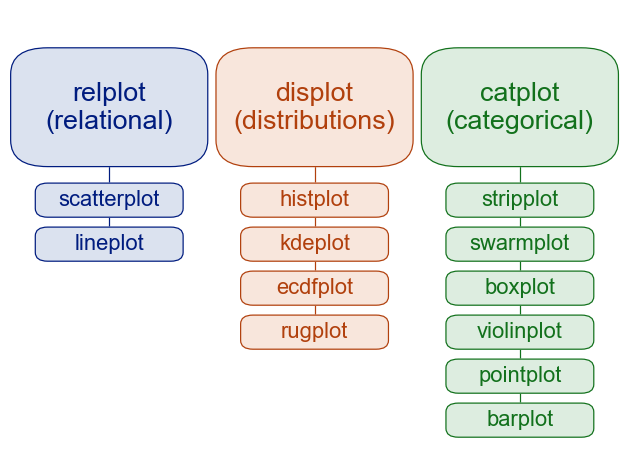

In addition to the different modules, seaborn has two types of functions: axes-level functions and figure-level functions.

axes-level functions take an explicit ax argument and return an Axes object, 
Figure-level functions create plots that potentially include Axes

Any customization made is on the axes object for axes-level functions and the figure object for figure-level functions. 

#### Facet Grids:

Facet Grids allow the convenient management of subplots. 

This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure. So instead of one bar chart, we might have four arranged together in a grid.


It can also represent levels of a third variable with the hue parameter, which plots different subsets of data in different colors. This uses color to resolve elements on a third dimension.

In [ ]:

sns.FacetGrid(tips)

#### replot: Figure-level interface for drawing relational plots onto a FacetGrid


Seaborn’s relplot function returns a FacetGrid object which is a figure-level object. 

scatterplot is the default

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

In [ ]:
sns.set_style("whitegrid")
sns.relplot(data=tips, x="total_bill", y="tip", hue="day");

if the hue semantic is categorical, the default palette is qualitative

if the hue semantic is quantitative the default palette is quantitative

In both cases, you can customize the color palette.

In [ ]:
splot=sns.relplot(x="total_bill", y="tip", hue="size", data=tips)
splot.fig.suptitle("Tips by size" ,
               fontsize = 16 , 
               fontweight = 'bold' )
  
splot.set_axis_labels( "Tip" , "Total Bill (USD)", fontsize= 14);


#### axes-level function

pass the figsize argument to the plt.subplots() function to set the figure size. The function plt.subplots() returns Figure and Axes objects. These objects are created ahead of time and later the plots are drawn on it. We make use of the set_title(), set_xlabel(), and set_ylabel() functions to change axis labels and set the title for a plot. We can set the size of the text with size attribute. Make sure to assign the axes-level object while creating the plot. This object is then used for setting the title and labels

In [ ]:
fig, ax = plt.subplots(figsize = ( 5 , 5 ))
  
# Plot the scatterplot
sns.scatterplot( ax = ax , x = "total_bill" , y = "tip" , hue='size',data = tips )
  
# Set label for x-axis
ax.set_xlabel( "Total Bill (USD)" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Tips (USD)" , size = 12 )
  
# Set title for plot
ax.set_title( "Bill vs Tips" , size = 18)
  
# Display figure
plt.show()

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", alpha=.5,data=tips);

In [ ]:
# Plot scatter plot
g = sns.relplot(data = tips , x = "total_bill" , 
                y = "tip" , col = "time" , 
                hue = 'size', 
                kind = "scatter" )
  
# Title for the complete figure
g.fig.suptitle("Tips by time of day" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
  
# Adjust subplots so that titles don't overlap
g.fig.subplots_adjust( top = 0.85 )
  
# Set x-axis and y-axis labels
g.set_axis_labels( "Tip" , "Total Bill (USD)",  size = 12)
  
# Display the figure
plt.show()

Assigning a col variable creates a faceted figure with multiple subplots arranged across the columns of the grid:

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", hue='time',col="time");

In [ ]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex");

#### Count Plots
Show the counts of observations in each categorical bin using bars

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

In [ ]:
ax = sns.countplot(x="class", hue="who", data=titanic)

In [ ]:
ax = sns.countplot(y="class", hue="who", data=titanic)

In [ ]:

sns.countplot(x = 'sex', hue = 'survived', data = titanic,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            )
plt.show()


### Bar Plots

The function is sns.barplot() takes paramaters data, x, and y and plots a barplot using data as the dataframe.

x is the column of the dataframe that contains the labels for the x axis, and y is the column of the dataframe that contains the data to graph (the y axis).

By default, each bin of a barplot displays the mean value of a variable. 

The estimator argument of the barplot() method in Seaborn can alter how the data is aggregated. 

The estimator argument can receive a function such as np.sum, len, np.median or other statistical function. This function can be used in combination with raw data such as a list of numbers and display in a barplot the desired statistic of this list.


By default the barplot function includes error bars. Seaborn uses a bootstrapped confidence interval to calculate these error bars.

The hue parameter can be used to create a bar plot with more than one dimension.

In [ ]:
sns.set(rc = {'figure.figsize' : (7, 5), 
               'axes.labelsize' : 12 })

tips = sns.load_dataset('tips')
sns.barplot(x = 'day', y = 'total_bill', hue = 'sex', data = tips,
            palette = 'Blues', edgecolor = 'w')
tips.groupby(['day','sex']).mean()

plt.show()

#### Faceted histograms


In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
sns.histplot(tips,x='tip');

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Pair plots
Pair plots are useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

Example using Iris dataset, which lists measurements of petals and sepals of three iris species:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

In [ ]:
sns.pairplot(iris, hue='species', height=2.5);

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

Cat plots


In [ ]:
sns.catplot(x="class", hue="who", col="survived",
                data=titanic, kind="count",
                height=4, aspect=.7);

In [ ]:
sns.histplot(titanic.age, kde=True)
plt.show()

In [ ]:
g = sns.FacetGrid(titanic, row='survived', col='class')
g.map(sns.histplot, "age")
plt.show()

In [ ]:
g = sns.catplot(x="who", y="survived", col="class",
                data=titanic, saturation=.5,
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
  .set_xticklabels(["Men", "Women", "Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  